# Metal Sheet Classifier
**Purpose:** Create an application which classifies defects in metal sheets that arise during manufacturing, identifies defect location and size on those sheets, and measures defect change over time.
<br>**Method:** To achieve these goals I will do the follow:

1. **Sample Generation:** Since I lack access to a sufficient dataset of images, I will create a series of sample data.
2. **Model Design and Training:** I will then design and train two neural net models, one for defect classification (what kind of defect is on the sheet), and one for defect location and size.
3. **Change Analysis:** I will use the models thus developed to identify the average rate of change for each defect (i.e, the speed at which the defect spreads across the surface area of the sheet). With more information on the process (such as what conditions are tracked during manufacturing) it would be trivial to extend the analysis to investigate what conditions are most likely to lead to certain defects, or a high rate of defect.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
I created two defect classes, Lines and Bubbles


Text(0.5, 1.0, 'None')

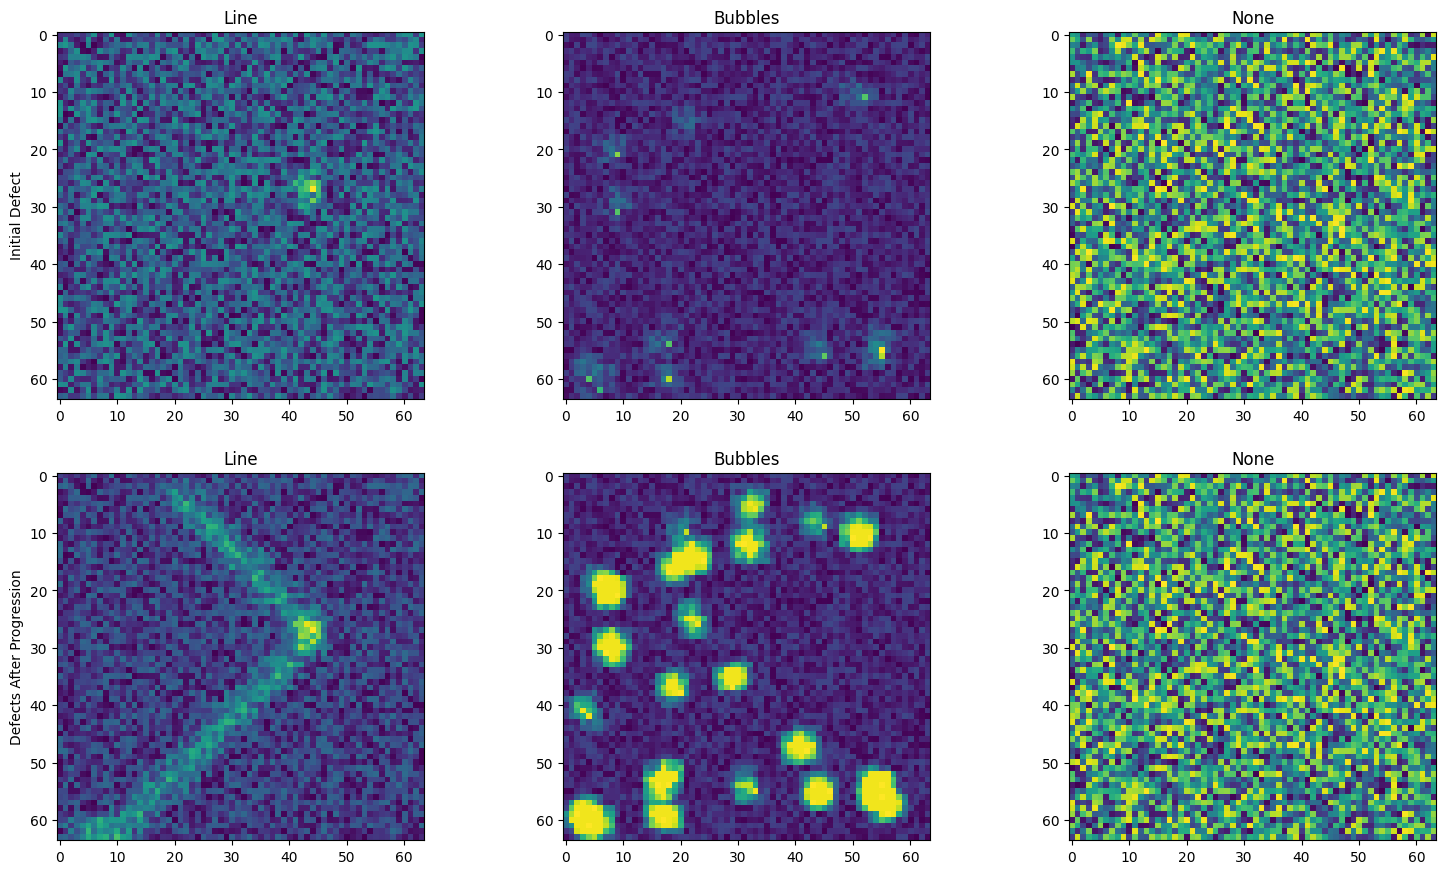

In [45]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from defects.Defect import Defect
from defects.Line import Line
from defects.Bubbles import Bubbles

print('I created two defect classes, Lines and Bubbles')
fig, axs = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
axs.flat[0].set(ylabel='Initial Defect')
axs.flat[3].set(ylabel='Defects After Progression')
l = Line(divergence_odds=10, growth_odds=70, growth_factor=1, initial_growth=2, id=0); l.show(axe=axs[0,0])
axs[0,0].set_title('Line')
b = Bubbles(0, initial_growth=2); b.show(axe=axs[0,1])
axs[0,1].set_title('Bubbles')
d = Defect(0); d.show(axe=axs[0,2])
axs[0,2].set_title('None')

l.advance(60); l.show(axe=axs[1,0])
axs[1,0].set_title('Line')
b.advance(60); b.show(axe=axs[1,1])
axs[1,1].set_title('Bubbles')
d.advance(); d.show(axe=axs[1,2])
axs[1,2].set_title('None')

# b = Bubbles(0); b.show()
# f2.title.set_text('Bubbles')
# f2 = plt.subplot(1,3,3)
# d = Defect(0); d.show()
# f2.title.set_text('None')

# f3 = plt.subplot(1,3,1)
# f3.title.set_text('Line')
# l.advance(30); l.show()
# f4 = plt.subplot(1,3,2)
# b.advance(30); b.show()
# f4.title.set_text('Bubbles')
# f5 = plt.subplot(1,3,3)
# d = Defect(0).show()
# f5.title.set_text('None')



In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from os import path as p
from PIL import Image




In [143]:
areaset = AreaSet('/home/sms/Documents/hobbies/projects/ml_data/metal_sheets')
t = Trainer(2, 0.03, SheetHighlighter, areaset, 10, criterion=nn.BCELoss, show=True)
t.run_experiment()

0
0.6844714879989624
0.28340795636177063
0.07387056201696396
0.04958245903253555
0.06015792489051819
0.053806550800800323
0.024488121271133423
0.04435526579618454
Epoch [1/2], Train Loss: 0.1593
1
0.028642991557717323
0.08939848840236664
0.07774050533771515
0.04098104313015938
0.06601226329803467
0.043975669890642166
0.03935248777270317
0.07455230504274368
Experiment Complete


SheetHighlighter(
  (model): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(8, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Sigmoid()
  )
)

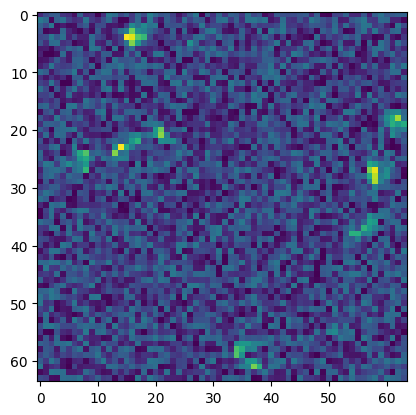

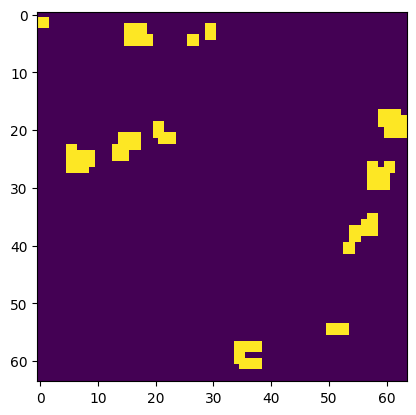

/tmp/ipykernel_765357/2655295301.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(t.model.forward(torch.tensor(areaset[3][0]).unsqueeze(0))[0][0].detach().numpy())


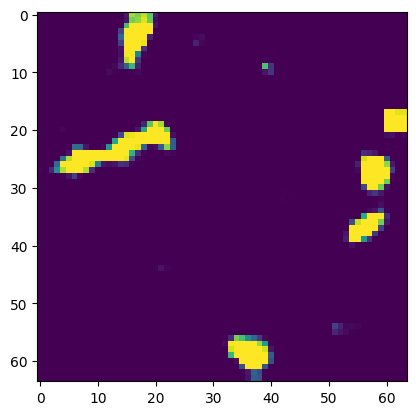

In [161]:
areaset = AreaSet('/home/sms/Documents/hobbies/projects/ml_data/metal_sheets')
plt.imshow(areaset[3][0][0])
plt.show()
plt.imshow(areaset[3][1][0])
plt.show()
plt.imshow(t.model.forward(torch.tensor(areaset[3][0]).unsqueeze(0))[0][0].detach().numpy())

In [62]:
t.evaluate_model(t.model, t.testing_loader)

ValueError: operands could not be broadcast together with shapes (0,) (1,64,64) 

In [5]:
trainer = Trainer(30, 0.03, SheetClassifier, ss, show=True)
trainer.evaluate_model(model, loader)

NameError: name 'ss' is not defined

In [110]:
ss = SheetSet('../../../ml_data/metal_sheets')
trainer = Trainer(30, 0.03, SheetClassifier, ss, show=True)
trainer.run_experiment()

0
Epoch [1/30], Train Loss: 8.4493
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Experiment Complete


SheetClassifier(
  (model): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin1): Linear(in_features=16384, out_features=3, bias=True)
)

In [112]:
model, loader = trainer.model, trainer.testing_loader

In [75]:
model.eval()

SheetClassifier(
  (model): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin1): Linear(in_features=16384, out_features=3, bias=True)
)

In [89]:
ss[15][0][0]

tensor([[113., 167.,   5.,  ..., 191.,  55., 169.],
        [ 69., 127., 173.,  ..., 135., 117.,  77.],
        [ 39., 123., 145.,  ...,  19., 187., 187.],
        ...,
        [ 95.,  55., 175.,  ...,  95., 165., 193.],
        [115.,  57.,  69.,  ..., 163.,  51., 133.],
        [ 29.,  -1., 149.,  ...,  43., 117.,  79.]])

In [104]:
for i, (x,y) in enumerate(training_loader):
    if i > 0: break
    yhat = model(x)
    print(torch.argmax(yhat, dim=1))
    print(y)

tensor([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2,
        1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2,
        1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1,
        2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2,
        2, 2, 0, 2])
tensor([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2,
        1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2,
        1, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1,
        2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2,
        2, 2, 0, 2])
